# Create Lexical Semantic Dynamic Graph from Text Corpora - Lexical Semantic Change Analysis Tool

Create a lexical semantic dynamic graph for the specific target words.
We can see the lexical semantic change dynamics from such a graph based on the knowledge of text corpora. 

In [4]:
import bertcloud as bc
import sensecluster as sc
import visualization as vs
import utils as utils

In [5]:
def gen_cloud(keyword, corpus):
    prbert_model = 'bert-base-multilingual-cased'
    cloud, stat_emb = bc.bert_cloud(keyword, corpus, prbert_model)
    static_embeds = utils.init_static_embedding()
    utils.update_static_embeds(static_embeds, stat_emb)
    return cloud, static_embeds

Set the target word `mouse` and its historical corpus path `corpus_path1`, present corpus path `corpus_path2`.


In [6]:
keyword = 'mouse'
corpus_path1 ='./data/words/en/mouse/sendata/sendata1.txt'
corpus_path2 ='./data/words/en/mouse/sendata/sendata2.txt'

Load text corpora.

In [7]:
corpus1 = utils.load_text_corpus(corpus_path1)
corpus2 = utils.load_text_corpus(corpus_path2)
print(corpus1[0])
print(corpus2[0])

he shake like a leaf when cast his eye to the ground he see the lose pupil of ellen with grief in the jaw of a mouse and the sly little thief whisk away from his sight with a bind
"Old Christmass Returnd", a ballad collected by Samuel Pepys, celebrated the revival of festivities in the latter part of the century: "Old Christmass is come for to keep open house / He scorns to be guilty of starving a mouse, / Then come boyes and welcome, for dyet the chief / Plumb pudding, Goose, Capon, minc't pies &amp; Roast beef".


Construct contextualized embeddings cloud for the target word in two periods.

In [8]:
cloud1, static_embeddings1 = gen_cloud(keyword, corpus1)
cloud2, static_embeddings2 = gen_cloud(keyword, corpus2)
static_embeddings = utils.merge_static_embeds(static_embeddings1, static_embeddings2)

Set the semantic similarity threshold for the clustering algorithm.

In [9]:
t1=0.78
t2=0.62

Calculate sense clusters for word clouds of two periods.
We should specify a `k` nearest neighbor parameter for the clustering algorithm, here `k = 14`.

In [10]:
sense_clu1, _ = \
        sc.cloud_cluster(cloud1, static_embeddings, keyword, 'en', k=14, rt=t1, sct=t2)
sense_clu2, _ = \
        sc.cloud_cluster(cloud2, static_embeddings, keyword, 'en', k=14, rt=t1, sct=t2)

100%|██████████| 9975/9975 [00:13<00:00, 762.51it/s]


Calculate similarity matrix of the sense clusters in two periods.

In [11]:
sim_matrix = sc.sim_matrix(sense_clu1, sense_clu2, static_embeddings)
print("Similarity matrix: \n", sim_matrix)
similarity = sim_matrix > t2
print("Similarity: \n", similarity)

Similarity matrix: 
 [[0.68945344 0.4882737 ]]
Similarity: 
 [[ True False]]


Plot the semantic dynamic graph of the target words.
We should also specify a `k` nearest neighbor parameter for the plotting of the graph, here `k = 6`.

[['rat', 'cat', 'rabbit', 'meadow', 'bat', 'house', 'dog', 'rats']]
[['rat', 'bat', 'mice', 'animal', 'rats', 'mouses', 'Mus', 'mammal'], ['mousepad', 'Mouse', 'keyboard', 'computer', 'mouses', 'device', 'user', 'mice']]


/home/xianghe/samenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xianghe/samenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xianghe/samenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


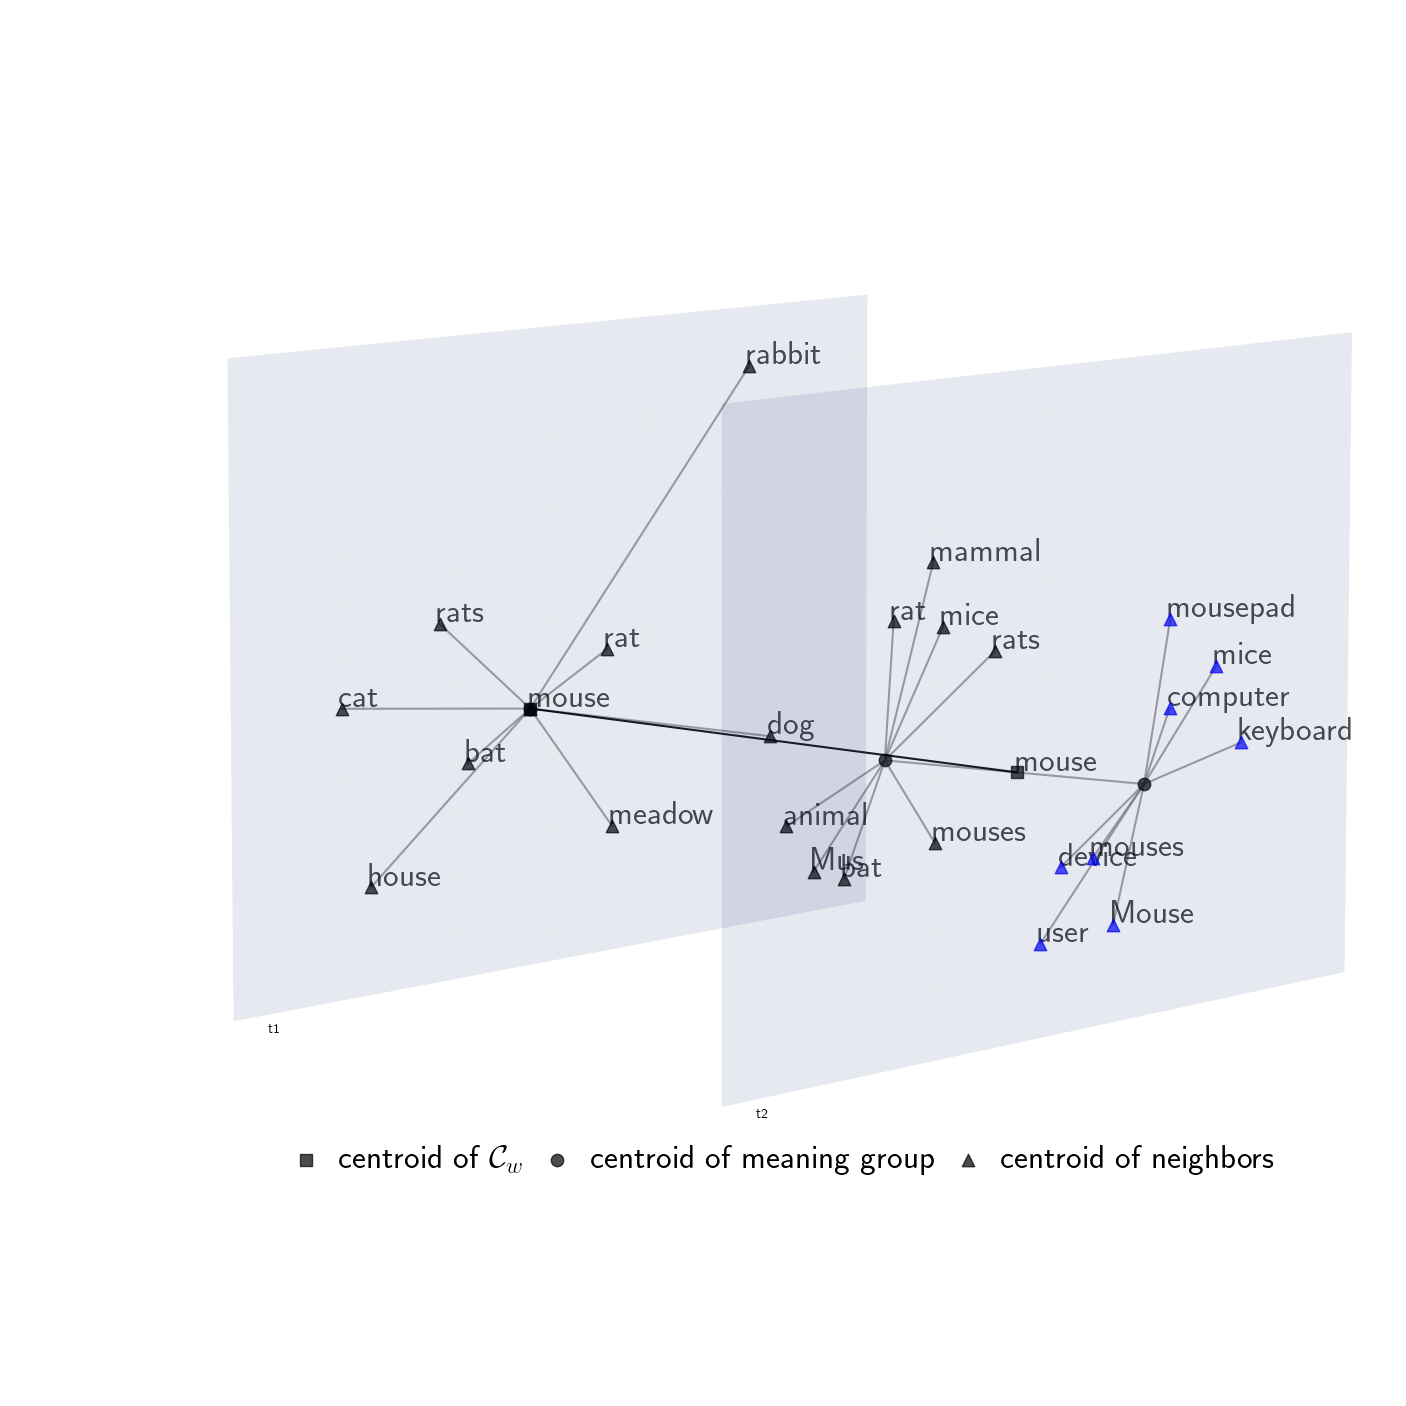

In [12]:
vs.plt_sense_dynamic_graph(sense_clu1, cloud1, sense_clu2, cloud2, similarity, k=6)